# So,how did we fare in 2022?

---
**Placement season is on the run!** 

With the December session drawing to a close, here's a visualization of how ECE seniors in my University delivered; with a bit of statistics and python magic.
(without disclosing personal info XD )    
---

**A few libraries I imported**

In [346]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats

In [190]:
df = pd.read_csv('test.csv')

In [145]:
len(df)

96

Above is a dataframe of 96 students who've bagged offers, please note, **there are more to get placed, so we only have sample data.**

In [191]:
#CTC is the only column, indicating the Cost To Company; i.e Total Salary Package

#Shifting units to LPA (Lakhs per Annum)

df['CTC'] = df['CTC'].apply(lambda salary: salary/10**5)

In [192]:
#stats rounded to 2 decimal places

np.round(df.describe(),2)

,CTC
count,96.00
mean,10.08
std,3.96
min,3.60
25%,7.97
50%,8.62
75%,13.00
max,27.22


So, the minimum stands at 3.6L while the maximum so far, is ~27.22L.The top 50% made over 8.62L while those over the 75th percentile made over 27.22L !

---
Below is a Histogram coupled with a Kernel density approximator visualizing the table above.

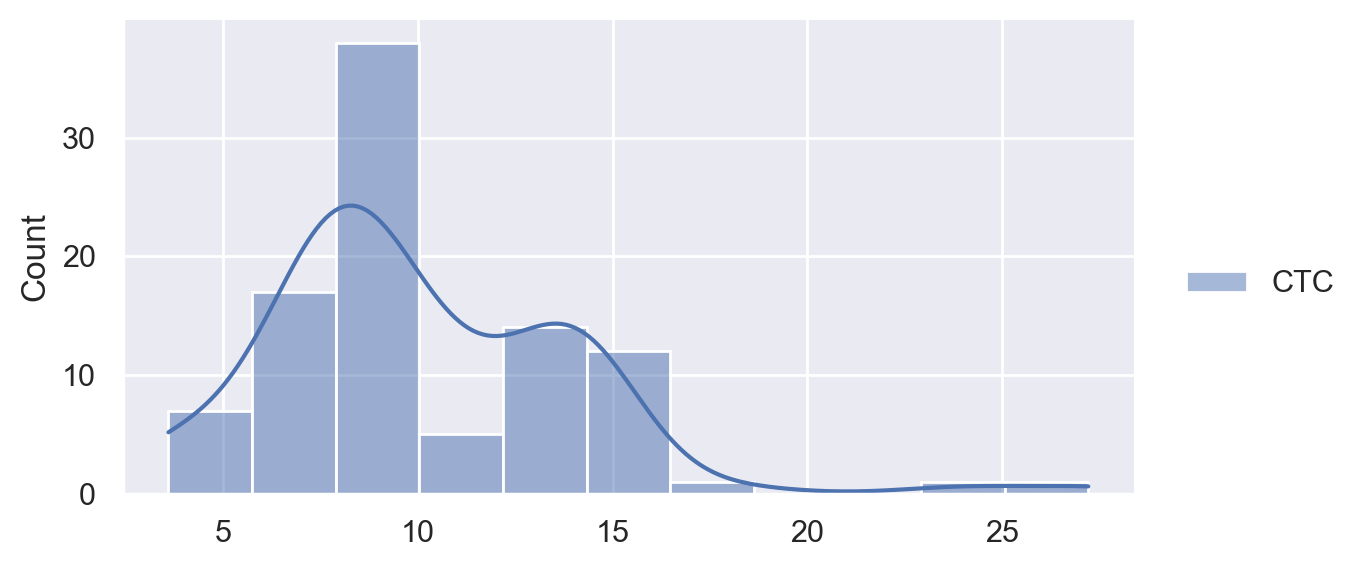

In [296]:
sns.set_style(style='darkgrid')
sns.set(rc={"figure.dpi":200})
sns.displot(df,kde=True,height=3,aspect=2);

**NOTE: The X axis is adjusted in millions per annum**

---
The Kernel Density Approximation is produced via stacking Standard Normal Distributions over every sample salary point,and then summing and normalizing to get the sample's prob. density function. 

<Figure size 1600x800 with 0 Axes>

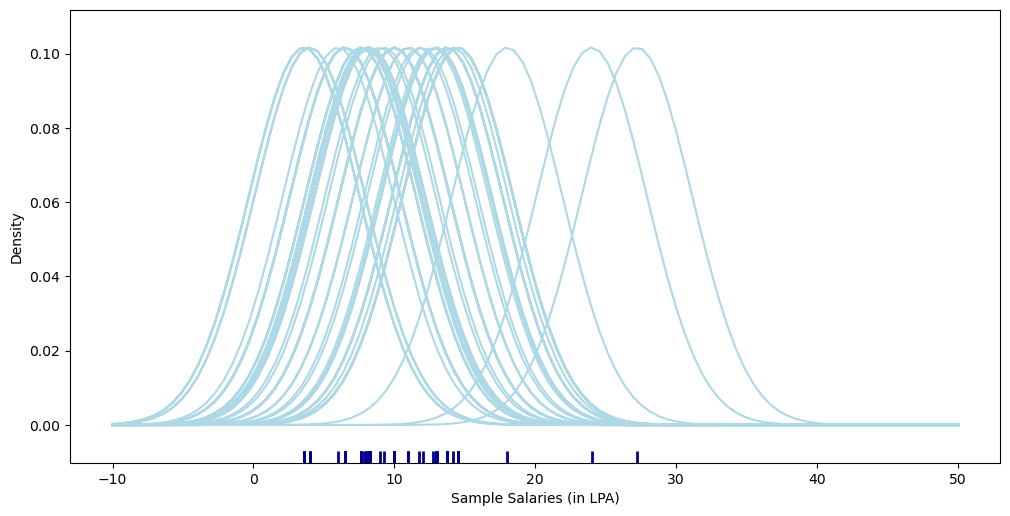

In [236]:
sns.reset_orig()
x = df['CTC'].values
plt.figure(figsize=(8,4),dpi=200)
bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-10, 50, 100)

kernels = []

plt.figure(figsize=(12,6),dpi=100)
plt.xlabel('Sample Salaries (in LPA)')
plt.ylabel('Density')

for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="lightblue")

    #to display individual salaries
sns.rugplot(x, color="darkblue", linewidth=2);

<Figure size 1600x800 with 0 Axes>

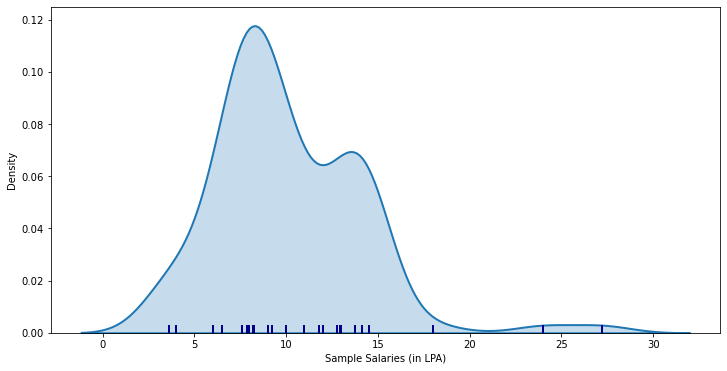

In [298]:
sns.reset_orig()
plt.figure(figsize=(8,4),dpi=200)
bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-10, 50, 100)

kernels = []

plt.figure(figsize=(12,6))
plt.xlabel('Sample Salaries (in LPA)')
plt.ylabel('Density')

for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)

sns.rugplot(x, color="darkblue", linewidth=2);
plt.ylim([0,0.125])
sns.kdeplot(x,linewidth=2,shade=True);

Our data is right skewed; while the majority were offered ~90k a month, few others crossed the 12LPA mark, and the two instances over 20LPA are outliers.. 

In [195]:
df.skew()

CTC    1.266109
dtype: float64

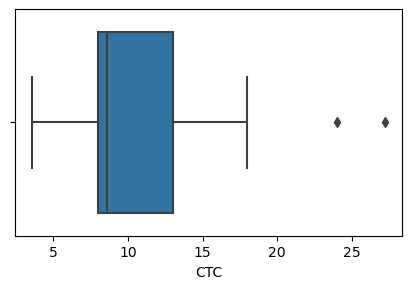

In [247]:
plt.figure(figsize=(5,3),dpi=100)
sns.boxplot(data=df,x='CTC')
plt.show()

#YOU CAN SEE THE TWO OUTLIERS OUT ON THE RIGHT

---



## The Real Question: 

**Can we make claims on the population before we have access to this information?** 

In other words, what can be said about the overall department average, even before all the students are placed? 

To answer this, we test a hypothesis: the **TRUE AVERAGE** is say, 11LPA.

To perform this test, we rely on the prowess of inferential statistics!
Since we don't have access to the Population's Standard Deviation, we use the **Student's T-distribution**, which looks much like the **Gaussian distribution**, but with fatter tails.

---
<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/72cbe32d684449906a1abc4a9a6087e66eaa3178">

where <img src = https://wikimedia.org/api/rest_v1/media/math/render/svg/c15bbbb971240cf328aba572178f091684585468> 
is the number of degrees of freedom (df) and 
<img src = https://wikimedia.org/api/rest_v1/media/math/render/svg/4cfde86a3f7ec967af9955d0988592f0693d2b19> 
is the gamma function.

Here, df = (sample size)-1 = 96-1 = 95

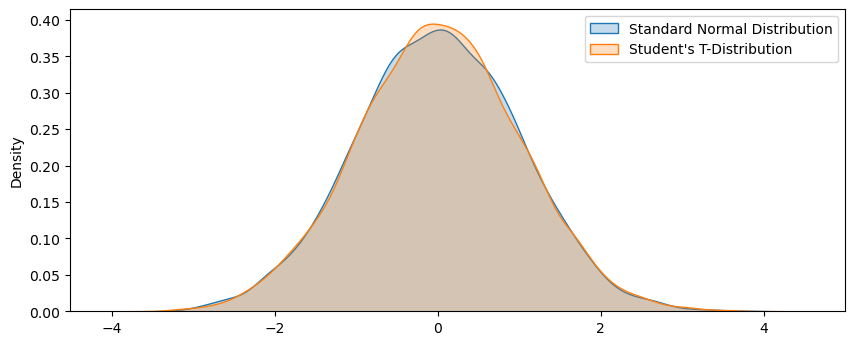

In [305]:
np.random.seed(100)

#GENERATE RANDOM SAMPLES FROM BOTH DISTRIBUTIONS TO COMPARE THEIR PLOTS

norm_values = np.random.randn(10000)
t_values = t.rvs(df=95,size=10000)

plt.figure(figsize=(10,4),dpi=100)
sns.kdeplot(data=norm_values,fill=True,label='Standard Normal Distribution')
sns.kdeplot(data=t_values,fill=True,legend=True,label="Student's T-Distribution")
plt.legend();

The takeaway is that the T-distribution converges with the Normal Distribution as the sample size grows. 

---

Our **Null Hypothesis** is :         True Mean = 11,00,000 LPA

**Alternate Hypothesis** is : True Mean != 11,00,000LPA

We use the T-score to estimate our chances via a two-sided t-test. The T-score simply conveys how many "standard errors" away the sample mean is from the hypothesized mean, the lower it is, higher is the probability of accepting the null hypothesis, and vice-versa.  

<img src = https://www.isobudgets.com/wp-content/uploads/2016/02/t-score-equation-e1456854317764.jpg>

In [269]:
#xbar
sample_mean = np.round(float(df.mean()),2)  #IN LPA

#mu
hypothesized_mean = 11 #IN LPA

#s
sample_deviation = np.round(float(df.std()),2)  

#n 
sample_size = len(df)

#t
T_score = (sample_mean-hypothesized_mean)/(sample_deviation/sample_size**0.5)

The final T-score is:

In [272]:
T_score

-2.276293498343963

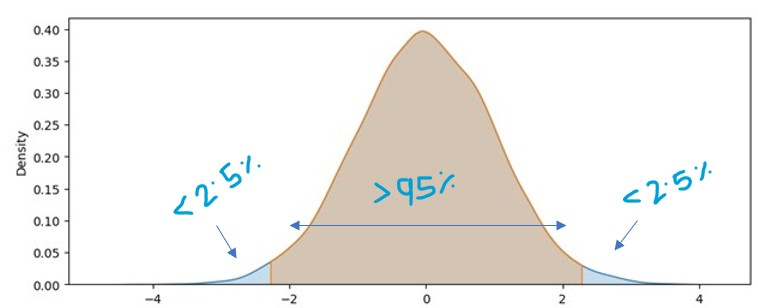

In [337]:
from IPython.display import Image
Image(filename ="prob.jpg")

**And so, from the standard 68%-95%-99.7% rule, we can show that the probability of the TRUE AVERAGE being around 11LPA is below 2.5% !**

Using **Sci-Py**'s one-sample t-test, we show that the **p-value** we've found earlier agrees with our plot:

In [344]:
t_score,pvalue = ttest_1samp(df,11) #returns tuple of T-score and p-value 

pd.DataFrame({'T SCORE':t_score,'P VALUE':pvalue})

,T SCORE,P VALUE
0,-2.280764,0.024797


---
## What does this mean for us?

So, is the estimated mean salary lower than 11LPA or higher?  To answer this, we go for confidence intervals.

Confidence Intervals provide, with some "confidence" in terms of probability, the expected range of a population parameter, simply by using sample statistics.

<img src = https://www.isobudgets.com/wp-content/uploads/2016/02/confidence-interval-unknown-standard-deviation.jpg>

<img src = "https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/1729/2017/04/15032548/m10_inference_mean_topic_10_2_m10_est_pop_means_3_image1.png">

If we'd like higher confidence, the critical value is higher, thereby increasing the error margin.

Larger the sample size, more certainty there is, and so smaller is the error margin.

Larger the sample deviation, more certainty there is, and so smaller is the error margin.

In [364]:
#xbar
sample_mean = np.round(float(df.mean()),2)  #IN LPA

# t / Tc

#95% confidence level
critical_value_95 = scipy.stats.t.ppf(q=1-0.05/2,df=95)

#99% confidence level
critical_value_99 = scipy.stats.t.ppf(q=1-0.01/2,df=99)

#s
sample_deviation = np.round(float(df.std()),2)  

#n 
sample_size = len(df)

The 95% confidence estimate of **TRUE AVERAGE** in LPA is:

In [367]:
np.round([sample_mean-critical_value_95*sample_deviation/sample_size**0.5,sample_mean+critical_value_95*sample_deviation/sample_size**0.5],2)

array([ 9.28, 10.88])

The 99% confidence estimate of **TRUE AVERAGE** is:

In [370]:
np.round([sample_mean-critical_value_99*sample_deviation/sample_size**0.5,sample_mean+critical_value_99*sample_deviation/sample_size**0.5],2)

array([ 9.02, 11.14])

## To be 99% sure, we'd expect this year's average between 9.02 and 11.14 LPA.

**Cheers!**

---